In [2]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/EUR JPY/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

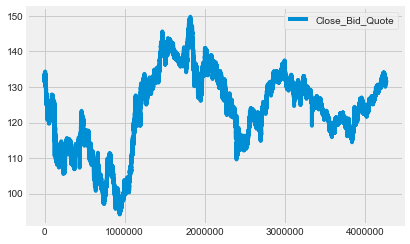

In [4]:
plt.figure(figsize=(20,5))
data.plot()

In [5]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:02:00          132.980
1        2010-01-03 17:03:00          132.980
2        2010-01-03 17:04:00          132.970
3        2010-01-03 17:05:00          133.000
4        2010-01-03 17:06:00          133.050
...                      ...              ...
4264694  2021-06-30 23:54:00          131.641
4264695  2021-06-30 23:55:00          131.642
4264696  2021-06-30 23:56:00          131.648
4264697  2021-06-30 23:57:00          131.649
4264698  2021-06-30 23:58:00          131.645

[4264699 rows x 2 columns]>

In [6]:
data['Timestamp'].min()

'2010-01-03 17:02:00'

In [7]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [8]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [9]:
data = data.resample("H").max()

In [10]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

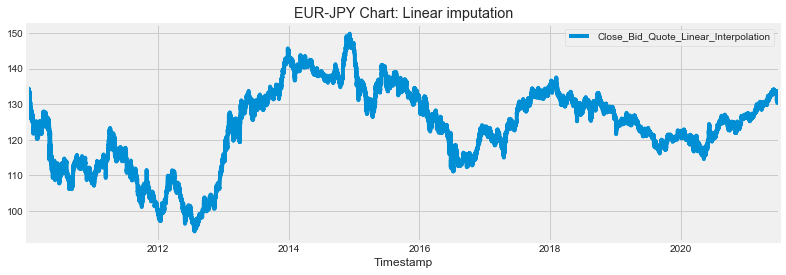

In [11]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart: Linear imputation')
plt.show(block=False)

In [12]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [13]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [14]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03 17:00:00,133.31
2010-01-03 18:00:00,133.23
2010-01-03 19:00:00,132.95
2010-01-03 20:00:00,132.77
2010-01-03 21:00:00,132.75


In [15]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [16]:
len(test)

20143

In [17]:
len(train)

80568

In [18]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

80569

In [19]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.70339639],
       [0.70195648],
       [0.69691679],
       ...,
       [0.67339225],
       [0.67288828],
       [0.67350024]])

In [20]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [21]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.70339639, 0.70195648, 0.69691679, 0.69367699, 0.69331701,
       0.693497  , 0.69061718, 0.69493691, 0.69799672, 0.70069656,
       0.70033658, 0.7080761 , 0.70879605, 0.71077593, 0.71167588,
       0.71041595, 0.71077593, 0.70987599, 0.70681618, 0.70861607,
       0.70861607, 0.70753613, 0.70627621, 0.70555626, 0.7048363 ,
       0.70519628, 0.70573624, 0.70105653, 0.6983567 , 0.69763675,
       0.69655681, 0.6918771 , 0.69367699, 0.69637682, 0.69403697,
       0.69223708, 0.69169711, 0.69439695, 0.6951169 , 0.69313703,
       0.68611746, 0.68197772, 0.68089778, 0.6758581 , 0.67441819,
       0.67657805, 0.67621807, 0.67603809, 0.67675804, 0.67567811,
       0.67297828, 0.67963786, 0.67801796, 0.68053781, 0.68287766,
       0.68377761, 0.68287766, 0.68107777, 0.68197772, 0.69403697])]
[0.6938569808671864]

[array([0.70339639, 0.70195648, 0.69691679, 0.69367699, 0.69331701,
       0.693497  , 0.69061718, 0.69493691, 0.69799672, 0.70069656,
       0.70033658, 0.7080761 , 0.708

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2516/2516 [==============================] - 200s 76ms/step - loss: 0.0027
Epoch 2/10
2516/2516 [==============================] - 129s 51ms/step - loss: 3.7298e-05
Epoch 3/10
2516/2516 [==============================] - 128s 51ms/step - loss: 2.9496e-05
Epoch 4/10
2516/2516 [==============================] - 137s 55ms/step - loss: 1.9862e-05
Epoch 5/10
2516/2516 [==============================] - 139s 55ms/step - loss: 1.5812e-05
Epoch 6/10
2516/2516 [==============================] - 137s 54ms/step - loss: 1.1783e-05
Epoch 7/10
2516/2516 [==============================] - 136s 54ms/step - loss: 1.1065e-05
Epoch 8/10
2516/2516 [==============================] - 137s 54ms/step - loss: 9.8589e-06
Epoch 9/10
2516/2516 [==============================] - 188s 75ms/step - loss: 9.9869e-06
Epoch 10/10
2516/2516 [==============================] - 224s 89ms/step - loss: 9.9562e-06


In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.1804744655763059

In [28]:
rms = np.sqrt(mean_squared_error(y_test, predictions))
rms

0.1804744655763059

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


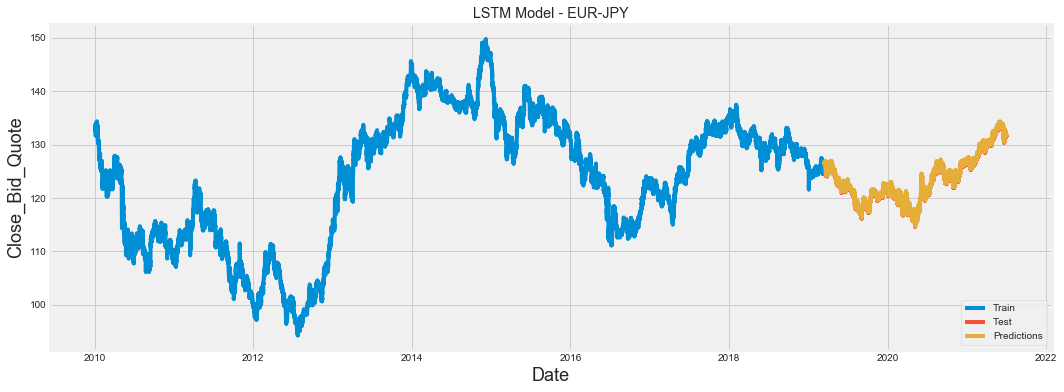

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - EUR-JPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-14 18:00:00,126.364,126.478050
2019-03-14 19:00:00,126.491,126.550880
2019-03-14 20:00:00,126.556,126.684044
2019-03-14 21:00:00,126.522,126.735039
2019-03-14 22:00:00,126.546,126.686096
...,...,...
2021-06-30 19:00:00,131.772,131.959244
2021-06-30 20:00:00,131.748,131.978333
2021-06-30 21:00:00,131.643,131.946793
